# ANZ Virtual Internship
## Task1: Exploratory Data Analysis

#### Loading the Transaction Data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ANZ synthesised transaction dataset.xlsx to ANZ synthesised transaction dataset.xlsx


In [2]:
import io
import pandas as pd
import numpy as np
df = pd.read_excel(io.BytesIO(uploaded['ANZ synthesised transaction dataset.xlsx']))

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df.head(3)

status  card_present_flag  ... merchant_long_lat movement
0  authorized                1.0  ...     153.38 -27.99    debit
1  authorized                0.0  ...     151.21 -33.87    debit
2  authorized                1.0  ...     151.21 -33.87    debit

[3 rows x 23 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [6]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [7]:
 date_generate =pd.date_range('01-August-2018','31-October-2018')
 date_generate

DatetimeIndex(['2018-08-01', '2018-08-02', '2018-08-03', '2018-08-04',
               '2018-08-05', '2018-08-06', '2018-08-07', '2018-08-08',
               '2018-08-09', '2018-08-10', '2018-08-11', '2018-08-12',
               '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
               '2018-08-17', '2018-08-18', '2018-08-19', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-25', '2018-08-26', '2018-08-27', '2018-08-28',
               '2018-08-29', '2018-08-30', '2018-08-31', '2018-09-01',
               '2018-09-02', '2018-09-03', '2018-09-04', '2018-09-05',
               '2018-09-06', '2018-09-07', '2018-09-08', '2018-09-09',
               '2018-09-10', '2018-09-11', '2018-09-12', '2018-09-13',
               '2018-09-14', '2018-09-15', '2018-09-16', '2018-09-17',
               '2018-09-18', '2018-09-19', '2018-09-20', '2018-09-21',
               '2018-09-22', '2018-09-23', '2018-09-24', '2018-09-25',
      

In [8]:
print("length of actual dates in date column:",len(np.unique(df.date)))
print("Length of dates for total months:",len(date_generate))

length of actual dates in date column: 91
Length of dates for total months: 92


#### that means one date is missing from the date column so we will not use this column for extraction

In [9]:
df.shape

(12043, 23)

In [10]:
 pd.DataFrame(list(zip(df.columns,df.isna().sum()/12043*100, df.isna().sum())))

0          1      2
0              status   0.000000      0
1   card_present_flag  35.921282   4326
2    bpay_biller_code  92.651333  11158
3             account   0.000000      0
4            currency   0.000000      0
5            long_lat   0.000000      0
6     txn_description   0.000000      0
7         merchant_id  35.921282   4326
8       merchant_code  92.667940  11160
9          first_name   0.000000      0
10            balance   0.000000      0
11               date   0.000000      0
12             gender   0.000000      0
13                age   0.000000      0
14    merchant_suburb  35.921282   4326
15     merchant_state  35.921282   4326
16         extraction   0.000000      0
17             amount   0.000000      0
18     transaction_id   0.000000      0
19            country   0.000000      0
20        customer_id   0.000000      0
21  merchant_long_lat  35.921282   4326
22           movement   0.000000      0

#### Columns bpay_biller_code & merchant_code have 92% data missing so we choose not to add these variables in Model building.

#### Correlation

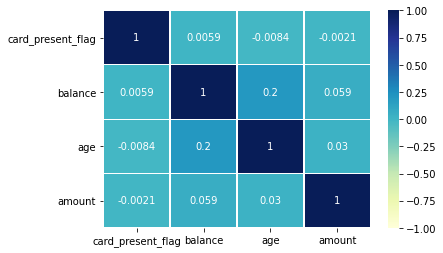

In [11]:
# Building heatmap
import seaborn as sns
corrmat=df[['card_present_flag','balance','age','amount']].corr()
sns.heatmap(corrmat ,vmin=-1,annot=True,cmap='YlGnBu',linewidths=0.1)

### Segment the dataset by transaction date and time

In [ ]:
# as we cannot find Time from date column so we are using extraction columns to find days, months & hours

In [12]:
df.extraction

0        2018-08-01T01:01:15.000+0000
1        2018-08-01T01:13:45.000+0000
2        2018-08-01T01:26:15.000+0000
3        2018-08-01T01:38:45.000+0000
4        2018-08-01T01:51:15.000+0000
                     ...             
12038    2018-10-31T23:09:06.000+0000
12039    2018-10-31T23:21:46.000+0000
12040    2018-10-31T23:34:25.000+0000
12041    2018-10-31T23:47:05.000+0000
12042    2018-10-31T23:59:44.000+0000
Name: extraction, Length: 12043, dtype: object

In [13]:
type(df['extraction'][0])

str

In [14]:
# converting to datetime
df['time']=pd.to_datetime(df['extraction'])

In [15]:
type(df['time'])

pandas.core.series.Series

In [16]:
# Extracting date from timestamp
df['new_date']=df['time'].dt.date

In [17]:
# converting date column into pandas timestap 
df['new_date']=pd.to_datetime(df['new_date'])
type(df['new_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
# Now extracting weekdays and months from date
df['days']=df['new_date'].dt.day_name()
df['months']=df['new_date'].dt.month_name()

In [19]:
df.days.value_counts()

Friday       2073
Wednesday    2063
Thursday     1801
Saturday     1709
Sunday       1550
Tuesday      1487
Monday       1360
Name: days, dtype: int64

In [20]:
df.months.value_counts()

October      4087
September    4013
August       3943
Name: months, dtype: int64

In [21]:
# extract hours from timestamp
df['hours']=df['time'].dt.hour

In [22]:
df['hours']

0         1
1         1
2         1
3         1
4         1
         ..
12038    23
12039    23
12040    23
12041    23
12042    23
Name: hours, Length: 12043, dtype: int64

In [23]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'time', 'new_date', 'days', 'months', 'hours'],
      dtype='object')

In [24]:
## confirm the one -to -one link of account_id and customer_id 
print('Number of unique value in account id:',df.account.nunique())
print('Number of unique value in customer id:',df.customer_id.nunique())

Number of unique value in account id: 100
Number of unique value in customer id: 100


#### Split the customere and merchant longitute and lattitude into individual column

In [25]:
df2 =  df.dropna(subset=['merchant_id'],axis=0)
df2.isnull().sum()

status                  0
card_present_flag       0
bpay_biller_code     7715
account                 0
currency                0
long_lat                0
txn_description         0
merchant_id             0
merchant_code        7717
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb         0
merchant_state          0
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
merchant_long_lat       0
movement                0
time                    0
new_date                0
days                    0
months                  0
hours                   0
dtype: int64

In [26]:
dfloc=df2[['long_lat','merchant_long_lat']]
dfloc.head()

long_lat merchant_long_lat
0  153.41 -27.95     153.38 -27.99
1  153.41 -27.95     151.21 -33.87
2  151.23 -33.94     151.21 -33.87
3  153.10 -27.66     153.05 -26.68
4  153.41 -27.95     153.44 -28.06

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:

dfloc[['m_long','m_lat']]=dfloc.merchant_long_lat.str.split(expand=True)
dfloc.head()

long_lat merchant_long_lat  m_long   m_lat
0  153.41 -27.95     153.38 -27.99  153.38  -27.99
1  153.41 -27.95     151.21 -33.87  151.21  -33.87
2  151.23 -33.94     151.21 -33.87  151.21  -33.87
3  153.10 -27.66     153.05 -26.68  153.05  -26.68
4  153.41 -27.95     153.44 -28.06  153.44  -28.06

In [29]:
dfloc[['c_long','c_lat']]= dfloc.long_lat.str.split(expand=True)
dfloc.head()

long_lat merchant_long_lat  m_long   m_lat  c_long   c_lat
0  153.41 -27.95     153.38 -27.99  153.38  -27.99  153.41  -27.95
1  153.41 -27.95     151.21 -33.87  151.21  -33.87  153.41  -27.95
2  151.23 -33.94     151.21 -33.87  151.21  -33.87  151.23  -33.94
3  153.10 -27.66     153.05 -26.68  153.05  -26.68  153.10  -27.66
4  153.41 -27.95     153.44 -28.06  153.44  -28.06  153.41  -27.95

In [30]:
dfloc=dfloc.drop(columns=['long_lat','merchant_long_lat'],axis=1)
dfloc.head()

m_long   m_lat  c_long   c_lat
0  153.38  -27.99  153.41  -27.95
1  151.21  -33.87  153.41  -27.95
2  151.21  -33.87  151.23  -33.94
3  153.05  -26.68  153.10  -27.66
4  153.44  -28.06  153.41  -27.95

In [31]:
#df3 = pd.concat([df,dfloc],axis = 1)
#df3.head()

### Converting location information into float type and filter the location for Australia only to check who reside outside the Australia

In [32]:
df3 = dfloc[['m_long','m_lat','c_long','c_lat']].astype('float')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 12042
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_long  7717 non-null   float64
 1   m_lat   7717 non-null   float64
 2   c_long  7717 non-null   float64
 3   c_lat   7717 non-null   float64
dtypes: float64(4)
memory usage: 301.4 KB


In [33]:

df_temp=df3[(df3['c_long']>113) & (df3['c_long']<154)]
df_temp

m_long  m_lat  c_long  c_lat
0      153.38 -27.99  153.41 -27.95
1      151.21 -33.87  153.41 -27.95
2      151.21 -33.87  151.23 -33.94
3      153.05 -26.68  153.10 -27.66
4      153.44 -28.06  153.41 -27.95
...       ...    ...     ...    ...
12038  145.23 -37.81  149.83 -29.47
12039  150.88 -33.96  151.22 -33.87
12040  150.92 -33.74  151.12 -33.89
12041  145.09 -37.91  144.96 -37.76
12042  151.19 -33.93  150.92 -33.77

[7638 rows x 4 columns]

In [34]:
df_temp2=df_temp[(df_temp['c_lat']>(-44)) & (df_temp['c_lat']<(-10))]

In [35]:
df_temp3=df3[~df3.isin(df_temp2)].dropna()
df_temp3

m_long  m_lat  c_long  c_lat
47    151.21 -33.87   255.0 -573.0
473   145.09 -37.90   255.0 -573.0
477   145.09 -37.90   255.0 -573.0
500   150.95 -33.74   255.0 -573.0
531   151.25 -33.89   255.0 -573.0
...      ...    ...     ...    ...
8371  151.15 -34.09   255.0 -573.0
8390  151.21 -33.87   255.0 -573.0
8416  145.77 -16.92   255.0 -573.0
8799  153.03 -27.45   255.0 -573.0
8821  151.20 -33.87   255.0 -573.0

[79 rows x 4 columns]

In [36]:
df_temp3 = pd.concat([df_temp3,df['customer_id']],axis = 1)
df_temp3.dropna(axis=0,inplace=True)
df_temp3
  

m_long  m_lat  c_long  c_lat     customer_id
47    151.21 -33.87   255.0 -573.0  CUS-1617121891
473   145.09 -37.90   255.0 -573.0  CUS-1617121891
477   145.09 -37.90   255.0 -573.0  CUS-1617121891
500   150.95 -33.74   255.0 -573.0  CUS-1617121891
531   151.25 -33.89   255.0 -573.0  CUS-1617121891
...      ...    ...     ...    ...             ...
8371  151.15 -34.09   255.0 -573.0  CUS-1617121891
8390  151.21 -33.87   255.0 -573.0  CUS-1617121891
8416  145.77 -16.92   255.0 -573.0  CUS-1617121891
8799  153.03 -27.45   255.0 -573.0  CUS-1617121891
8821  151.20 -33.87   255.0 -573.0  CUS-1617121891

[79 rows x 5 columns]

In [37]:
np.unique(df_temp3.customer_id)

array(['CUS-1617121891'], dtype=object)

##### there is only one customer who resides outside the Australia. howrver, transaction histories occured within AU thus these records are included for further analysis.


### Challenge with location attribute

In [38]:
df_loc2 = pd.concat([df_temp2,df2['customer_id']],axis=1)
df_loc2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 12042
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   m_long       7638 non-null   float64
 1   m_lat        7638 non-null   float64
 2   c_long       7638 non-null   float64
 3   c_lat        7638 non-null   float64
 4   customer_id  7717 non-null   object 
dtypes: float64(4), object(1)
memory usage: 361.7+ KB


In [40]:
df_loc2.dropna(subset=['m_long','m_lat','c_long','c_lat'],axis=0,inplace=True)
df_loc2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7638 entries, 0 to 12042
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   m_long       7638 non-null   float64
 1   m_lat        7638 non-null   float64
 2   c_long       7638 non-null   float64
 3   c_lat        7638 non-null   float64
 4   customer_id  7638 non-null   object 
dtypes: float64(4), object(1)
memory usage: 358.0+ KB


In [41]:
# Haversine formula example in Python
# vectorized haversine function

def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


In [42]:
#df_temp2['p_latitude'] = df_temp2['c_lat'].shift(1)
#df_temp2['p_longitude'] = df_temp2['c_long'].shift(1)


df_loc2['distance'] = df_loc2[['c_lat','c_long','m_lat', 'm_long']].apply(lambda x: haversine(x[1], x[0], x[3], x[2]), axis=1)

In [43]:
df_loc2

m_long  m_lat  c_long  c_lat     customer_id    distance
0      153.38 -27.99  153.41 -27.95  CUS-2487424745    5.190680
1      151.21 -33.87  153.41 -27.95  CUS-2487424745  632.025780
2      151.21 -33.87  151.23 -33.94  CUS-2142601169    7.175493
3      153.05 -26.68  153.10 -27.66  CUS-1614226872   97.317268
4      153.44 -28.06  153.41 -27.95  CUS-2487424745   11.436504
...       ...    ...     ...    ...             ...         ...
12038  145.23 -37.81  149.83 -29.47    CUS-55310383  934.198669
12039  150.88 -33.96  151.22 -33.87  CUS-2688605418   38.807209
12040  150.92 -33.74  151.12 -33.89  CUS-2663907001   26.598193
12041  145.09 -37.91  144.96 -37.76  CUS-1388323263   19.893307
12042  151.19 -33.93  150.92 -33.77  CUS-3129499595   33.819297

[7638 rows x 6 columns]

In [44]:
print('minimum:',df_loc2.distance.min())
print('maximum:',df_loc2.distance.max())

minimum: 0.0
maximum: 4363.3240248273105


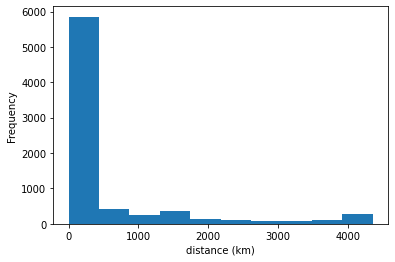

In [45]:
df_loc2.distance.plot(kind='hist')
plt.xlabel("distance (km)")
plt.show()

(array([1236., 1469., 1046.,  517.,  310.,  263.,  168.,   66.,   74.,
        2489.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

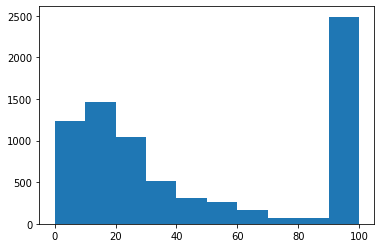

In [46]:
plt.hist(np.clip(df_loc2.distance,0,100),density=False)

###***Analyzing Days and Months columns***

#### In October month

In [ ]:
October = (df['months']=='October')
print('Average amount is:',df.loc[October,'amount'].mean())
print('Maximum amount is:',df.loc[October,'amount'].max())
print('Minimum amount is:',df.loc[October,'amount'].min())

Average amount is: 196.42732321996542
Maximum amount is: 8835.98
Minimum amount is: 0.1


#### In september month

In [ ]:
September=(df['months']=='September')
print('Average amount is:',df.loc[September,'amount'].mean())
print('Maximum amount is:',df.loc[September,'amount'].max())
print('Minimum amount is:',df.loc[September,'amount'].min())

Average amount is: 182.04590331422853
Maximum amount is: 8835.98
Minimum amount is: 0.1


#### In August

In [ ]:
August=(df['months']=='August')
print('Average amount is:',df.loc[August,'amount'].mean())
print('Maximum amount is:',df.loc[August,'amount'].max())
print('Minimum amount is:',df.loc[August,'amount'].min())

Average amount is: 185.12186659903654
Maximum amount is: 8835.98
Minimum amount is: 1.52


#### Months


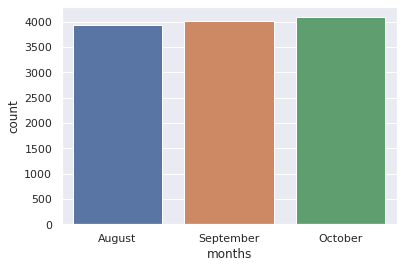

In [ ]:
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
sns.countplot(df.months)

#### Weekdays

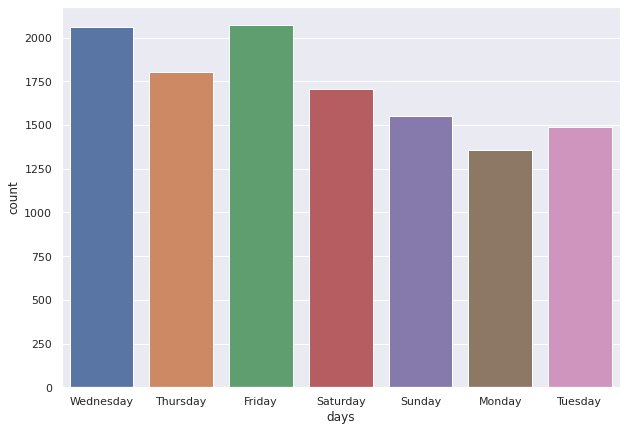

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(df.days)

#### Time

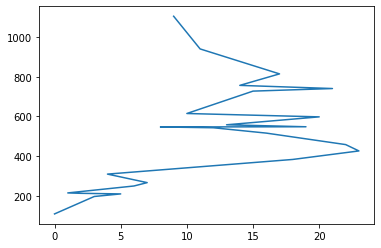

In [ ]:
df.hours.value_counts().plot()


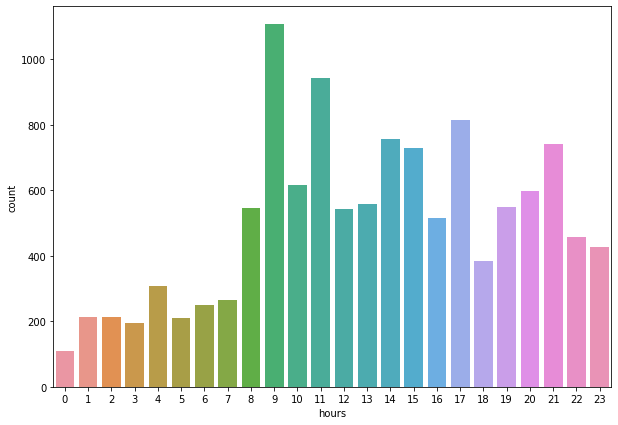

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(df.hours)

#### Merchant State

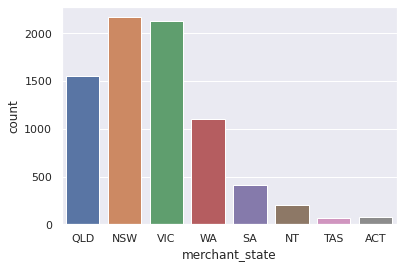

In [ ]:
sns.countplot(df.merchant_state)

#### Gender

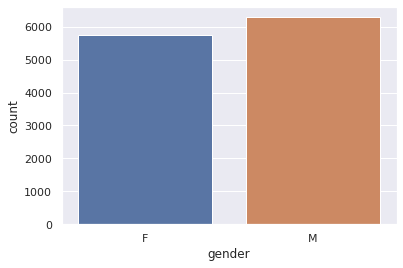

In [ ]:
sns.countplot(df.gender)

#### Age with Transaction amount & Balance

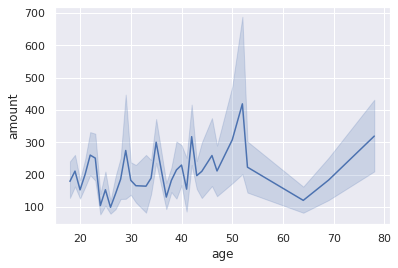

In [ ]:
import matplotlib.pyplot as plt
sns.lineplot(df.age,df.amount)

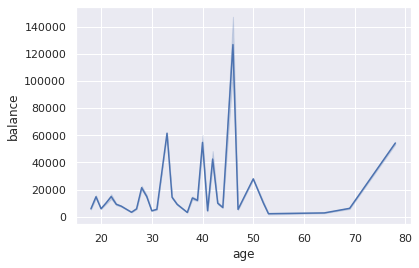

In [ ]:
# which age group have more balance
sns.lineplot(df.age,df.balance)

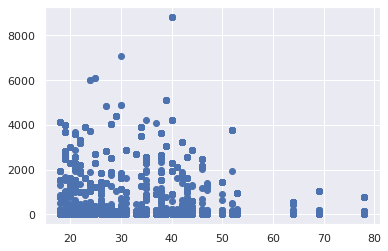

In [ ]:
plt.scatter(df.age,df.amount)

###  Considering the effect of any outliers that may distort the analysis.

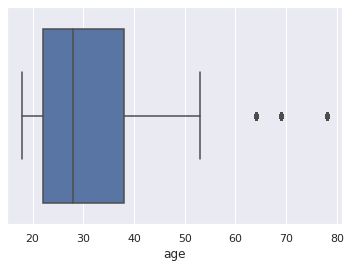

In [ ]:
#Boxplots
sns.boxplot(df.age)

#### Age without outliers

(array([0.06246664, 0.0341633 , 0.05373602, 0.02106737, 0.02657145,
        0.02474466, 0.03179084, 0.01501762, 0.00623955, 0.00991685]),
 array([18. , 21.5, 25. , 28.5, 32. , 35.5, 39. , 42.5, 46. , 49.5, 53. ]),
 <a list of 10 Patch objects>)

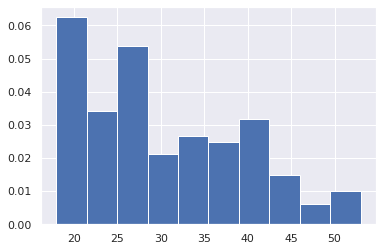

In [ ]:
plt.hist(np.clip(df.age,18,53),density=True)

#### Age with outliers

(array([0.04623709, 0.04333084, 0.02593484, 0.02976833, 0.01561073,
        0.00268482, 0.        , 0.00121786, 0.00141161, 0.00047054]),
 array([18., 24., 30., 36., 42., 48., 54., 60., 66., 72., 78.]),
 <a list of 10 Patch objects>)

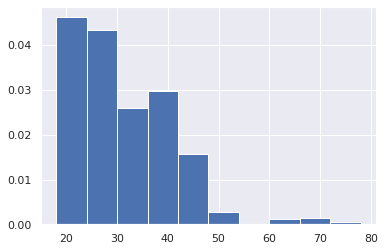

In [ ]:
plt.hist(np.clip(df.age,18,80),density=True)

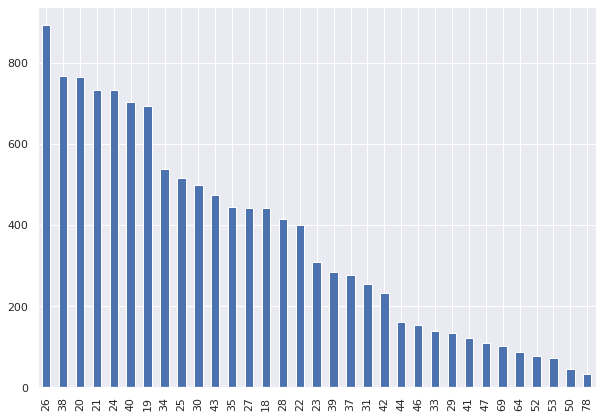

In [ ]:
plt.figure(figsize=(10,7))
df.age.value_counts().plot(kind='bar')

#### Amount Boxplot

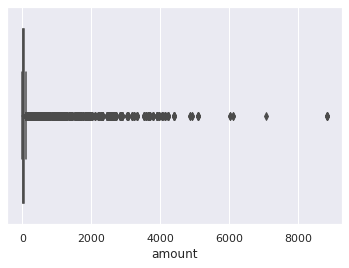

In [ ]:
sns.boxplot(df.amount)

(array([1.1159e+04, 4.1500e+02, 2.0900e+02, 1.4100e+02, 7.2000e+01,
        2.9000e+01, 9.0000e+00, 4.0000e+00, 1.0000e+00, 4.0000e+00]),
 array([1.00000e-01, 8.00090e+02, 1.60008e+03, 2.40007e+03, 3.20006e+03,
        4.00005e+03, 4.80004e+03, 5.60003e+03, 6.40002e+03, 7.20001e+03,
        8.00000e+03]),
 <a list of 10 Patch objects>)

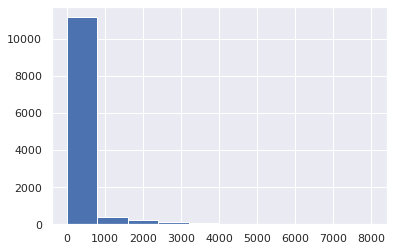

In [ ]:
plt.hist(np.clip(df.amount,0.1,8000))

(array([4180., 3675., 1497.,  470.,  278.,  174.,  196.,  178.,  149.,
        1246.]),
 array([1.0000e-01, 2.0090e+01, 4.0080e+01, 6.0070e+01, 8.0060e+01,
        1.0005e+02, 1.2004e+02, 1.4003e+02, 1.6002e+02, 1.8001e+02,
        2.0000e+02]),
 <a list of 10 Patch objects>)

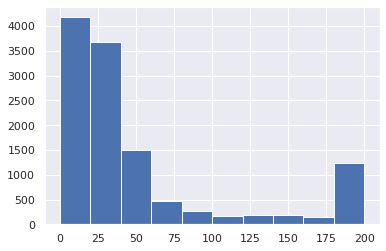

In [ ]:
plt.hist(np.clip(df.amount,0.1,200))

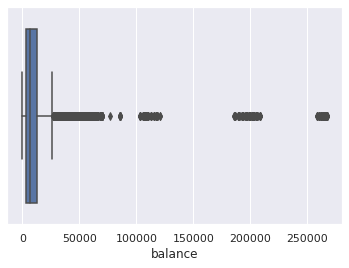

In [ ]:
sns.boxplot(df.balance)

#### Months with Gender

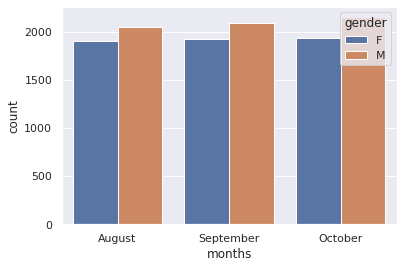

In [ ]:
sns.countplot(x=df.months,hue=df.gender)

#### Transaction made on each day of week

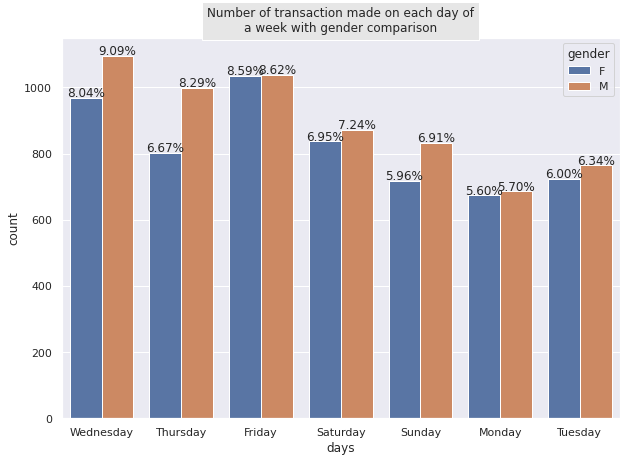

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x="days", hue="gender", data=df) 
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 

plt.title('Number of transaction made on each day of\n'+'a week with gender comparison',bbox={'facecolor':'0.9', 'pad':5})
plt.show()

#### Number of Transaction with description

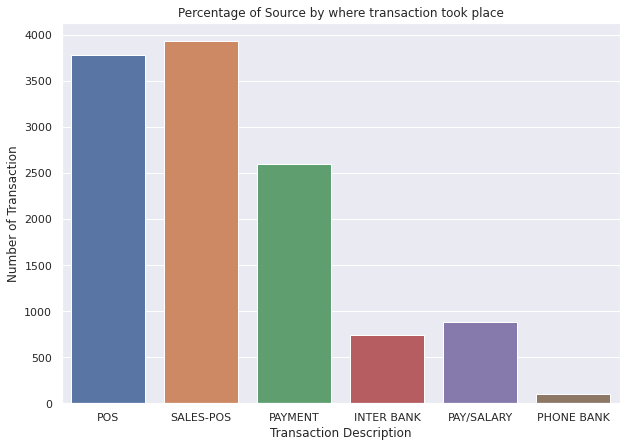

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(df.txn_description)
plt.title('Percentage of Source by where transaction took place')
plt.ylabel('Number of Transaction')
plt.xlabel('Transaction Description')
plt.show()

#### Movement

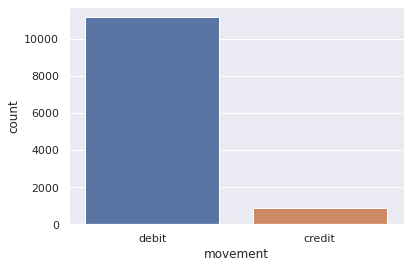

In [ ]:
sns.countplot(df.movement)

#### transaction description with Movement
##### All transactions are made with debit except for SALARY

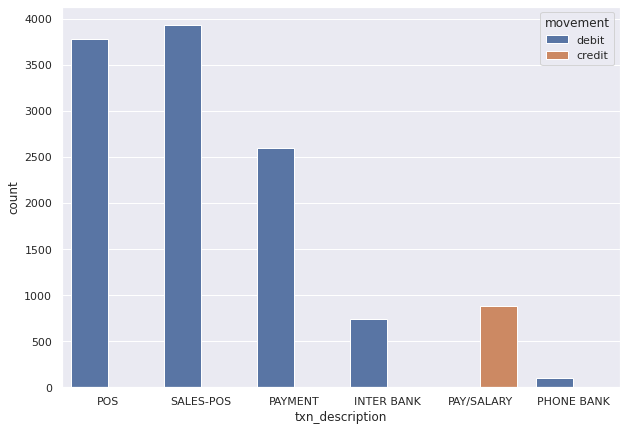

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x=df.txn_description,hue=df.movement)


#### Amount with Description
##### Highest amount transacted in PAY/SALARY

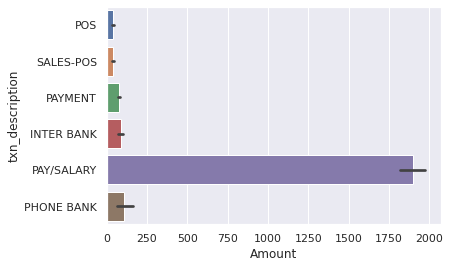

In [ ]:
sns.barplot(x=df.amount,y=df.txn_description)
plt.title("")
plt.xlabel("Amount")
plt.ylabel("txn_description")
plt.show()

#### Balance
##### High amount of balance in PHONE BANK

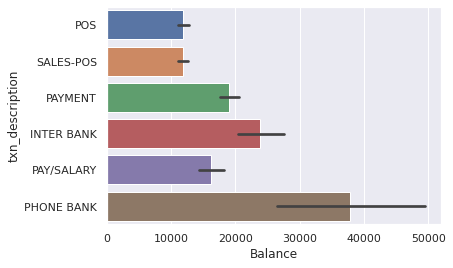

In [ ]:
sns.barplot(x=df.balance,y=df.txn_description)
plt.xlabel("Balance")
plt.ylabel("txn_description")
plt.show()

#### Transaction with Age

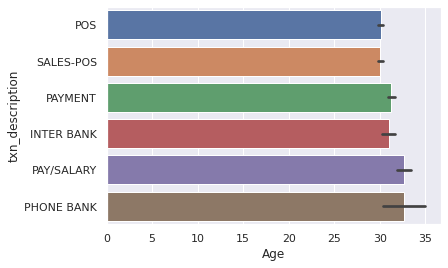

In [ ]:
sns.barplot(x=df.age,y=df.txn_description)
plt.xlabel("Age")
plt.ylabel("txn_description")
plt.show()

#### Amount with weekdays
##### highest amount is transacted on Monday

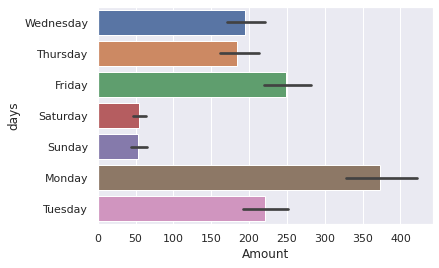

In [ ]:
sns.barplot(x=df.amount,y=df.days)
plt.xlabel("Amount")
plt.ylabel("days")
plt.show()

#### Balance with Weekdays
##### highest transacted balance is on Thursday 

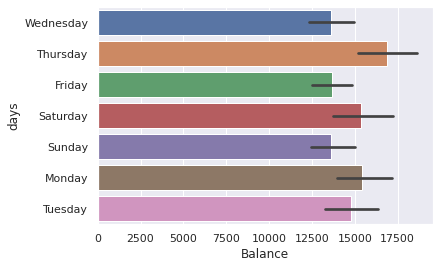

In [ ]:
sns.barplot(x=df.balance,y=df.days)
plt.xlabel("Balance")
plt.ylabel("days")
plt.show()

#### Amount with Months


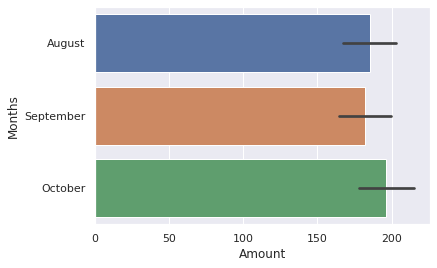

In [ ]:
sns.barplot(x=df.amount,y=df.months)
plt.xlabel("Amount")
plt.ylabel("Months")
plt.show()

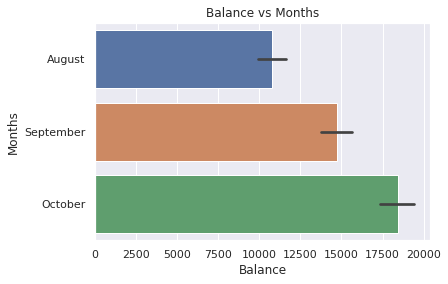

In [ ]:
sns.barplot(x=df.balance,y=df.months)
plt.title("Balance vs Months")
plt.xlabel("Balance")
plt.ylabel("Months")
plt.show()

### How many transactions do customers make each month, on average?

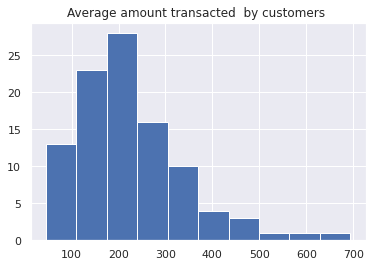

In [ ]:

group_by_cust=df.groupby(['customer_id'])
avg_amount=group_by_cust['amount'].mean()

plt.hist(avg_amount,bins=10)
plt.title("Average amount transacted  by customers ")
plt.show()

months
August       185.121867
October      196.427323
September    182.045903
Name: amount, dtype: float64


Text(0, 0.5, 'Month Name ')

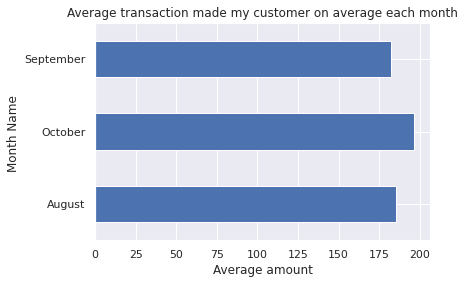

In [ ]:
group_by_month=df.groupby(['months'])
avg_amount2=group_by_month['amount'].mean()
print(avg_amount2)
avg_amount2.plot.barh()

plt.title('Average transaction made my customer on average each month')
plt.xlabel('Average amount')
plt.ylabel('Month Name ')

days
Friday       249.353517
Monday       373.221000
Saturday      54.419286
Sunday        53.015845
Thursday     184.010422
Tuesday      221.576456
Wednesday    195.215570
Name: amount, dtype: float64


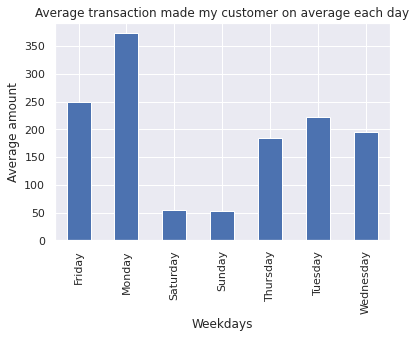

In [ ]:
days_grp=df.groupby(['days'])
avg_amt3=days_grp['amount'].mean()
print(avg_amt3)
avg_amt3.plot(kind='bar')
plt.title("Average transaction made my customer on average each day")
plt.xlabel("Weekdays")
plt.ylabel("Average amount")
plt.show()

#### Average transaction amount by States

In [ ]:
agg_amt=state_group['amount'].agg(['min','mean','max'])
agg_amt


min       mean      max
merchant_state                          
ACT             4.50  66.803836  1348.47
NSW             0.10  47.036316  4233.00
NT              1.71  44.726293  1285.09
QLD             0.10  34.372397  7081.09
SA              3.28  40.425470   909.61
TAS             7.35  28.866618   133.31
VIC             0.10  41.099953  3680.71
WA              2.05  30.901873  1692.56

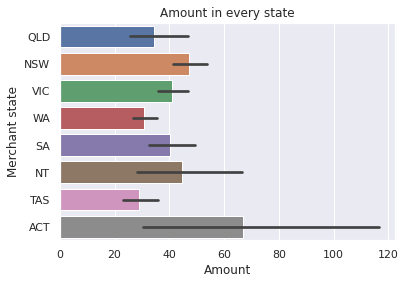

In [ ]:
sns.barplot(x=df.amount,y=df.merchant_state)
plt.title("Amount in every state")
plt.xlabel("Amount")
plt.ylabel("Merchant state")
plt.show()

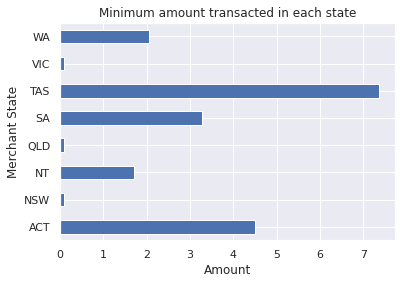

In [ ]:
agg_amt['min'].plot.barh()
plt.title("Minimum amount transacted in each state")
plt.xlabel("Amount")
plt.ylabel("Merchant State")
plt.show()

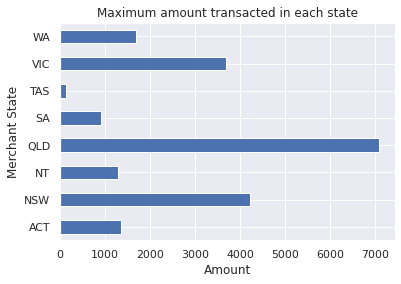

In [ ]:
agg_amt['max'].plot.barh()
plt.title("Maximum amount transacted in each state")
plt.xlabel("Amount")
plt.ylabel("Merchant State")
plt.show()

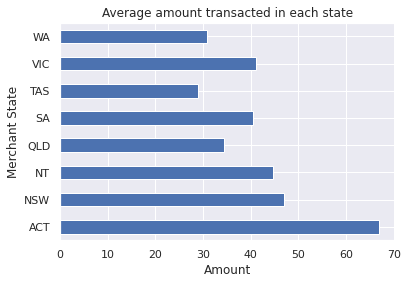

In [ ]:
agg_amt['mean'].plot.barh()
plt.title("Average amount transacted in each state")
plt.xlabel("Amount")
plt.ylabel("Merchant State")
plt.show()

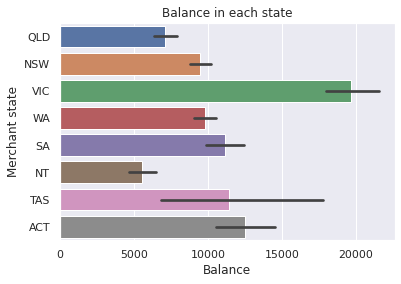

In [ ]:
sns.barplot(x=df.balance,y=df.merchant_state)
plt.title("Balance in each state")
plt.xlabel("Balance")
plt.ylabel("Merchant state")
plt.show()

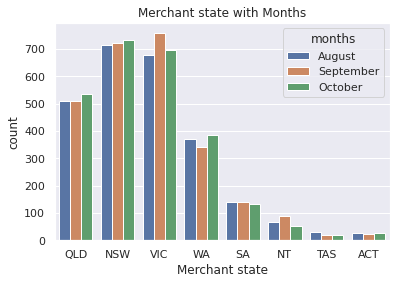

In [ ]:
sns.countplot(x=df.merchant_state,hue=df.months)
plt.title("Merchant state with Months")
plt.xlabel("Merchant state")
plt.show()

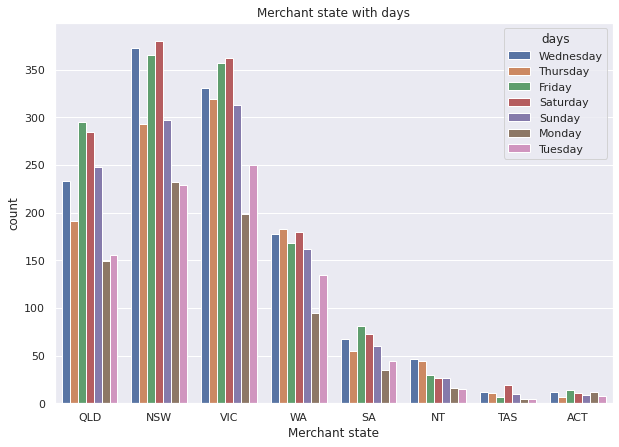

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x=df.merchant_state,hue=df.days)
plt.title("Merchant state with days")
plt.xlabel("Merchant state")
plt.show()

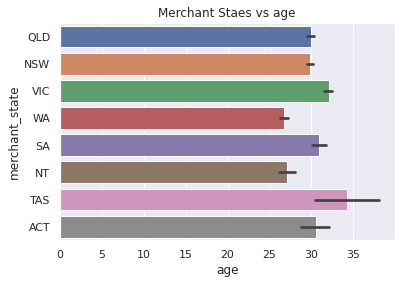

In [ ]:
sns.barplot(x=df.age,y=df.merchant_state)
plt.title("Merchant Staes vs age")
plt.show()

Text(0.5, 1.0, 'Age with days & Months')

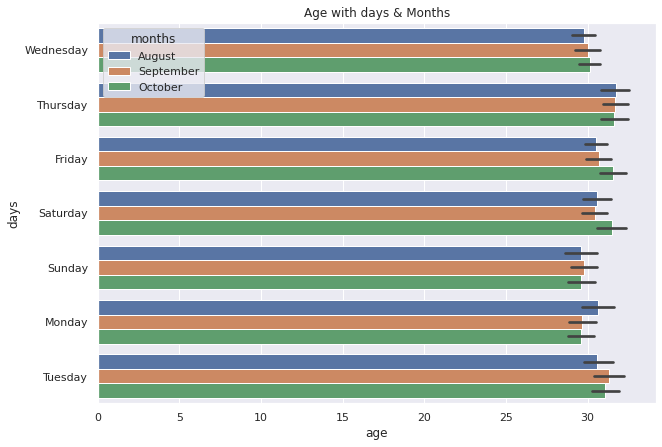

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x=df.age,y=df.days,hue=df.months)
plt.title("Age with days & Months")

#### Status

Text(0.5, 1.0, 'Status with Amount')

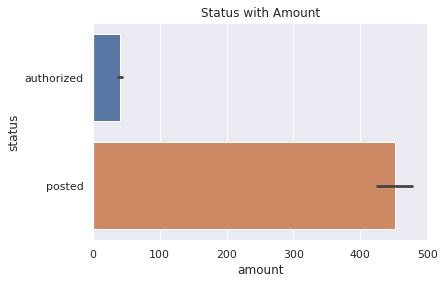

In [ ]:
sns.barplot(x=df.amount,y=df.status)
plt.title("Status with Amount")

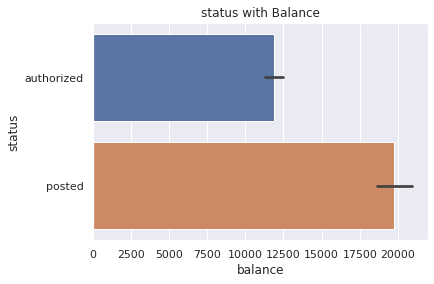

In [ ]:
sns.barplot(x=df.balance,y=df.status)
plt.title("status with Balance")
plt.show()

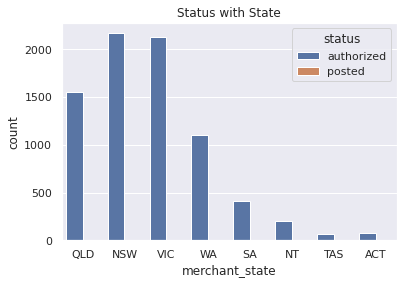

In [ ]:
sns.countplot(x=df.merchant_state,hue=df.status)
plt.title("Status with State")
plt.show()

#### Card present Flag

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64


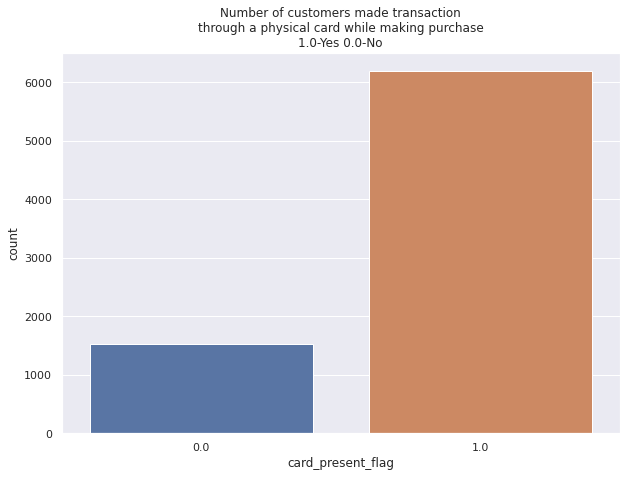

In [ ]:
plt.figure(figsize=(10,7))
print(df['card_present_flag'].value_counts())
ax = sns.countplot(x='card_present_flag' , data=df)
total = float(len(df['card_present_flag']))
plt.title('Number of customers made transaction\n'+'through a physical card while making purchase\n'+'1.0-Yes 0.0-No')
plt.show()

In [ ]:
# Checking the mean for numerical data in dataframe
df.mean()

card_present_flag        0.802644
merchant_code            0.000000
balance              14704.195553
age                     30.582330
amount                 187.933588
dtype: float64

In [ ]:
#The average age group of customers who made the transactions are 30 years of age.
#The average balance a customer have in their account is 14704.195 AUD.
#The average transaction made by the customer is 187.93 AUD.

#### Merechant state with Gender

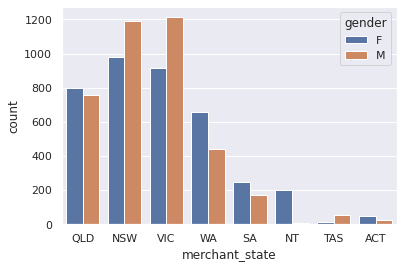

In [ ]:
sns.countplot(x=df.merchant_state,hue=df.gender)


In [ ]:
state_group=df.groupby(['merchant_state'])
print(state_group['gender'].value_counts(normalize=True))

merchant_state  gender
ACT             F         0.630137
                M         0.369863
NSW             M         0.548179
                F         0.451821
NT              F         0.975610
                M         0.024390
QLD             F         0.514139
                M         0.485861
SA              F         0.590361
                M         0.409639
TAS             M         0.764706
                F         0.235294
VIC             M         0.569216
                F         0.430784
WA              F         0.597273
                M         0.402727
Name: gender, dtype: float64


At Tasmania 76.4% Male made transaction and 23.5% Female made transaction which shows Male contributed alot to Tasmania.

At Western Australia Female have made 59.8% of transaction and Male made 40.2% of transaction which shows Female contribution is more in WA.

At Queensland Female have made 51.14% of transaction and Male made 48.96% of transaction which shows Female contribution is more in QLD.

At South Australia Female have made 59.03% of transaction and Male made 40.96% of transaction which shows Female contribution is more in SA.

At New South Wales Male have made 54.82% of transaction and Male made 45.18% of transaction which shows Female contribution is more in NSW.

At Victoria Male have made 56.92% of transaction and Male made 43.08% of transaction which shows Female contribution is more in Victoria

### Top 10 Customers who made transaction

In [ ]:
customer=df['first_name'].value_counts(sort=True).nlargest(10)
customer

Michael        746
Diana          578
Jessica        408
Joseph         391
Jeffrey        388
Richard        364
Kimberly       343
Tonya          292
Susan          282
Christopher    263
Name: first_name, dtype: int64

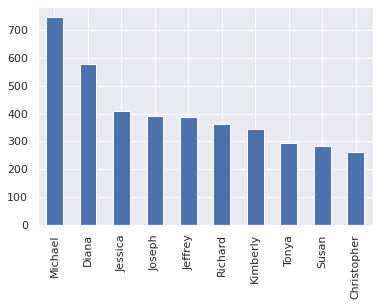

In [ ]:
df['first_name'].value_counts(sort=True).nlargest(10).plot(kind='bar')

In [ ]:
df.country.value_counts()

Australia    12043
Name: country, dtype: int64

In [ ]:
# Representation of transaction data on map

lat = []
lon = []
# For each row in a varible,
for row in df['long_lat']:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to long
        lon.append(row.split(' ')[0])
        # Split the row by comma and append
        # everything after the comma to lat
        lat.append(row.split(' ')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lon.append(np.NaN)
        # append a missing value to lon
        lat.append(np.NaN)

# Create two new columns from lat and lon
df['latitude'] = lat
df['longitude'] = lon
df['latitude'].head()

0    -27.95
1    -27.95
2    -33.94
3    -27.66
4    -27.95
Name: latitude, dtype: object

In [ ]:
df['latitude']=pd.to_numeric(df['latitude'])
df['longitude']=pd.to_numeric(df['longitude'])

In [ ]:
df['longitude'].max()

255.0

#### Challenge: Location Information

In [ ]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math
map = folium.Map(location=[153.41,-25.2744],tiles='cartodbpositron',zoom_start=5)


mc = MarkerCluster()
for idx, row in df.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(Marker([row['latitude'], row['longitude']]))
map.add_child(mc)



map

#### From the above interactive map we can conclude that the majority of transactions are done from Melbourne, Sydney, Brisbane and Perth